# Predicting House Prices Using Regression Techniques

## Objectives

In this project we will configure various regression models to predict house prices. Our goal is to obtain an efficient and highly accurate model.

## Implementation steps

1. Exploratory data analysis and initial cleaning

2. Feature engineering

3. Model training

## Exploratory data analysis and initial cleaning

In [1]:
# Importing relevant modules and specifying common settings

seed = 0

import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter


plt.style.use('fivethirtyeight')

In [3]:
# Importing the data

train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [7]:
print('Null values in train:', train.isnull().sum().sum())
print('Null values in test:', test.isnull().sum().sum())

Null values in train: 6965
Null values in test: 7000


In [8]:
# Writing a function to present counts, percentages, and data types of null
# values in each column of the datasets

def get_nulls_dtypes(df):
    '''
    Inputs:
    - A dataframe
    Process:
    - Calculates the numbers, percentages, and data types of
    null values in each column of the dataframe
    Output:
    - A dataframe that lists the counts, percentages and data types of the
    null values in three columns
    '''
    mask = df.isnull()
    total = mask.sum()
    percent = mask.mean() * 100
    dtypes = df.dtypes

    missing_data = pd.concat([total, percent, dtypes], axis=1, join='outer',\
                             keys=['count_null', 'percent_null', 'data_type'])
    missing_data.sort_values(by='percent_null', ascending=False, inplace=True)
    return missing_data[missing_data.count_null > 0]

In [9]:
# Presenting counts, percentages, and data types of null values in each column of the datasets

get_nulls_dtypes(train).T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical
count_null,1453,1406,1369,1179,690,259,81,81,81,81,81,38,38,37,37,37,8,8,1
percent_null,99.5205,96.3014,93.7671,80.7534,47.2603,17.7397,5.54795,5.54795,5.54795,5.54795,5.54795,2.60274,2.60274,2.53425,2.53425,2.53425,0.547945,0.547945,0.0684932
data_type,object,object,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,float64,object,object


In [10]:
get_nulls_dtypes(test).T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageQual,GarageFinish,GarageCond,GarageType,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,MasVnrType,MasVnrArea,MSZoning,BsmtHalfBath,Utilities,Functional,BsmtFullBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,KitchenQual,TotalBsmtSF,Exterior2nd,GarageCars,Exterior1st,GarageArea,SaleType
count_null,1456,1408,1352,1169,730,227,78,78,78,78,76,45,44,44,42,42,16,15,4,2,2,2,2,1,1,1,1,1,1,1,1,1,1
percent_null,99.7944,96.5045,92.6662,80.1234,50.0343,15.5586,5.34613,5.34613,5.34613,5.34613,5.20905,3.0843,3.01576,3.01576,2.87868,2.87868,1.09664,1.0281,0.27416,0.13708,0.13708,0.13708,0.13708,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401,0.0685401
data_type,object,object,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,object,float64,object,float64,object,object,float64,float64,float64,float64,object,float64,object,float64,object,float64,object


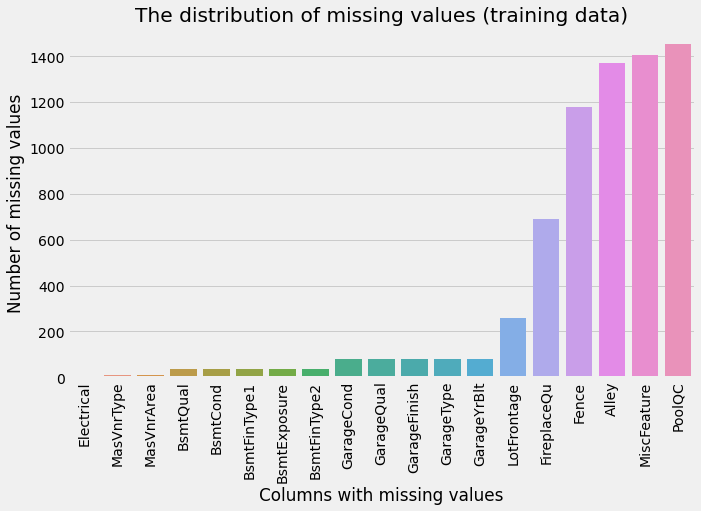

In [11]:
# Graphing the missing values

fig_size1 = (10, 6)
fig, ax = plt.subplots(figsize=fig_size1)

missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

sns.barplot(x=missing.index, y=missing.values, ax=ax)

ax.set_title('The distribution of missing values (training data)')
ax.set_xlabel('Columns with missing values')
ax.set_ylabel('Number of missing values');
plt.xticks(rotation=90);

How are the sale prices distributed?

In [12]:
# Calculating skewness and kurtosis
print("Skewness: ", round(train.SalePrice.skew(), 4))
print("Kurtosis: ", round(train.SalePrice.kurt(), 4))

Skewness:  1.8829
Kurtosis:  6.5363


The skewness and kurtosis values indicates that the sale prices are not normally distributed. There are many outliers on the higher side of the sale-price range.

The average sale price may be high because of the outliers, but the sales prices of most of the houses in the dataset are lower than the average sale price.

Next, we will draw a histogram, a probability plot, and a box plot to better understand the distribution of sale prices. We will write a reusable function first and then apply the function.

In [13]:
def draw_three_combos(data, fig_size):
    '''
    Draws a histogram, a probability plot, and a box plot within a 3x3 grid
    '''
    fig = plt.figure(constrained_layout=True, figsize=fig_size)
    grid = fig.add_gridspec(3, 3)

    ## Histogram
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(data, norm_hist=True, ax = ax1)
    # Making sure tick labels aren't presented in the exponential form
    ax1.get_yaxis().get_major_formatter().set_scientific(False)

    # Probability plot 
    ax2 = fig.add_subplot(grid[1, :2])
    stats.probplot(data, plot = ax2)

    ## Box plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box plot')
    sns.boxplot(data, orient='v', ax = ax3 );

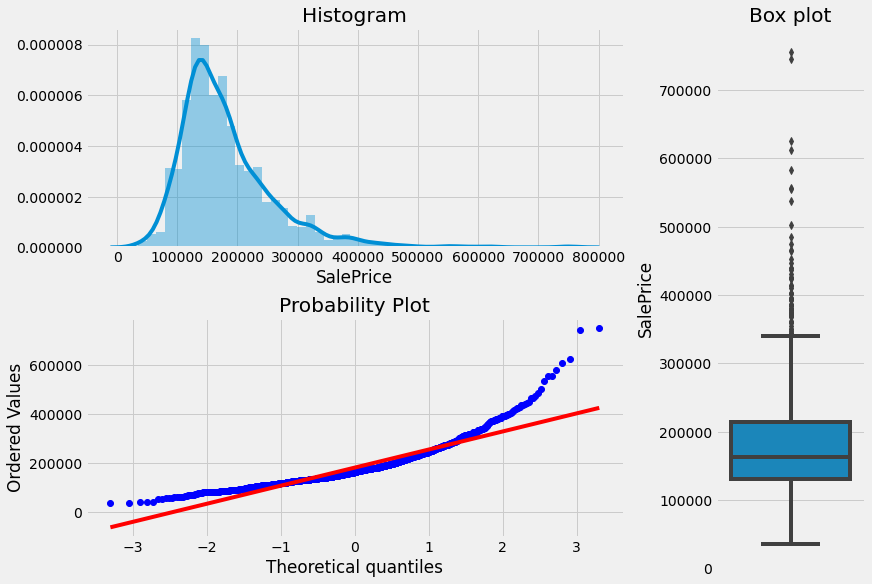

In [14]:
feature= 'SalePrice'
data = train.loc[:,feature]

fig_size2 = (12, 8)

draw_three_combos(data, fig_size2)

The plots also show that the sale prices are not normally distributed. The histogram is tail heavy. It indicates that there are many outliers—extremely high sale prices. The probability and box plots corroborate these results.

Let us look further into how different types of distributions fit the sale-price data.

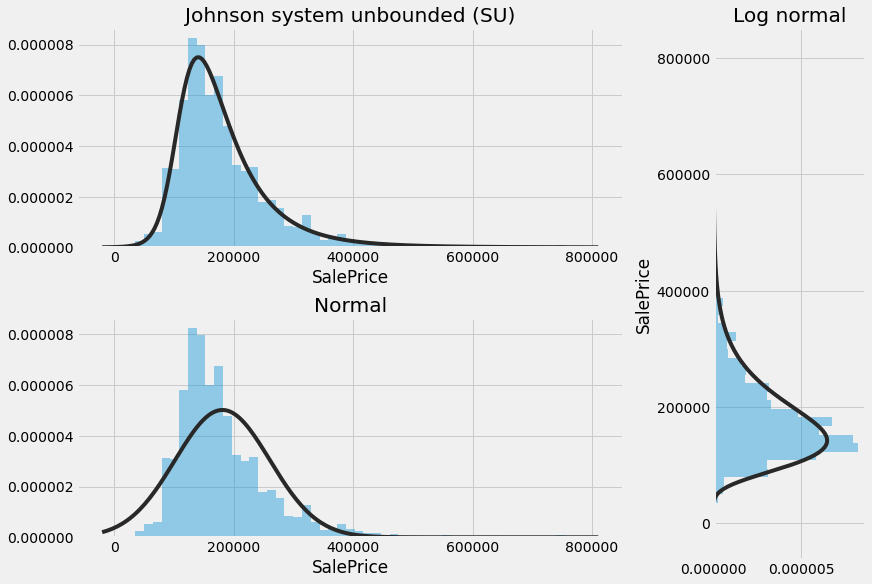

In [15]:
fig = plt.figure(constrained_layout=True, figsize=fig_size2)
grid = fig.add_gridspec(3, 3)

## Johnson SU
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Johnson system unbounded (SU)')
sns.distplot(data, kde=False, fit=stats.johnsonsu, ax=ax1)
# Making sure tick labels aren't presented in the exponential form
ax1.get_yaxis().get_major_formatter().set_scientific(False)

## Normal
ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('Normal')
sns.distplot(data, kde=False, fit=stats.norm, ax=ax2)
ax2.get_yaxis().get_major_formatter().set_scientific(False)

## Normal
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Log normal')
sns.distplot(data, kde=False, fit=stats.lognorm, vertical=True, ax=ax3)
ax3.get_xaxis().get_major_formatter().set_scientific(False);

A Johnson SU distribution fits the data the best.

Next, let us find out whether any of the independent numerical variables in the data have normal distributions.

In [16]:
numerical = [col for col in train.columns if train.dtypes[col] != 'object']
numerical.remove('SalePrice')
numerical.remove('Id')

In [17]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[numerical])
normal = normal.apply(test_normality)
print(not normal.any())

False


None of the independent variables are normally distributed either. So, before we begin training models, we will have to transform the dependent and independent variables.

For now, let us find out how the dependent and independent variables are correlated.

In [18]:
(train.corr() ** 2)['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

So, OverallQual has the strongest correlation with SalePrice. 

Let us graph the correlation between SalePrice and OverallQual, as well as some of the other independent variables that exhibit strong correlations. We will write a reusable function to draw a relevant graph and then apply the function.

In [19]:
def draw_scatterplot(df, x_val, y_val):
    '''
    Draws a scatter plot with a title
    '''
    fig, ax = plt.subplots(figsize=fig_size1)

    sns.scatterplot(df[x_val], df[y_val], ax=ax)

    ax.set_title(f'The correlation between {y_val} and {x_val}');

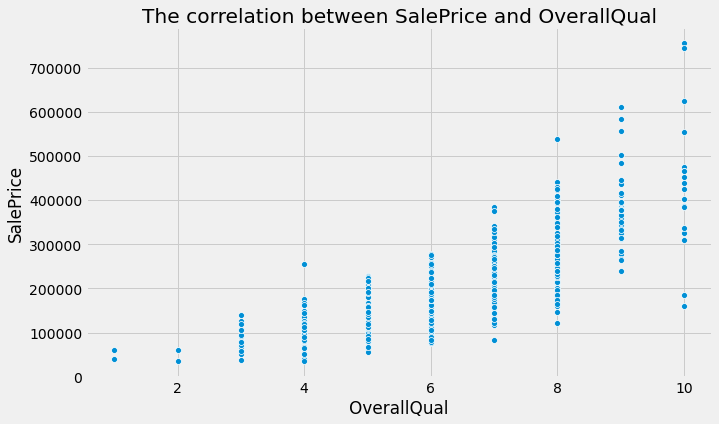

In [20]:
draw_scatterplot(train, 'OverallQual', 'SalePrice')

The plot shows that the sale prices are directly proportional to the overall quality of houses.

How are SalePrice and GrLivArea correlated?

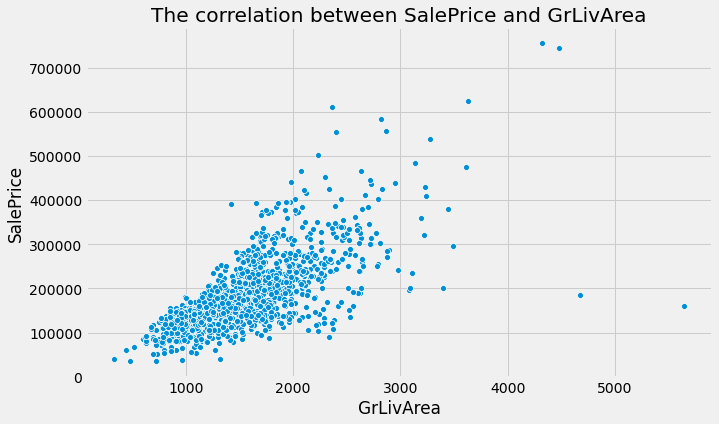

In [21]:
draw_scatterplot(train, 'GrLivArea', 'SalePrice')

In this case, there are a four sale-price outliers among GrLivArea values that are above 4000. Two of these outliers don't follow the prevalent trend of SalePrice values being directly proportional to GrLivArea values. Let us remove these outliers.

In [22]:
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

Let us also save the current version of the train dataset, so that we can compare it with future versions, following changes.

In [23]:
train_v1 = train.copy()

Next, let us look at the correlation between SalePrice and GarageArea.

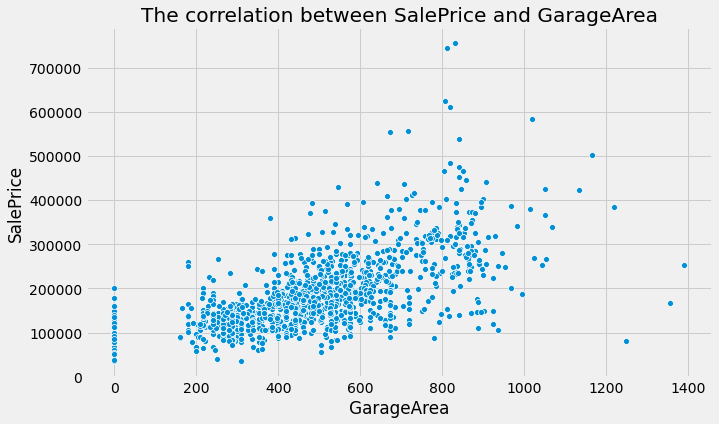

In [24]:
draw_scatterplot(train, 'GarageArea', 'SalePrice')

This plot also includes outliers.

What about the correlation between SalePrice and TotalBsmtSF?

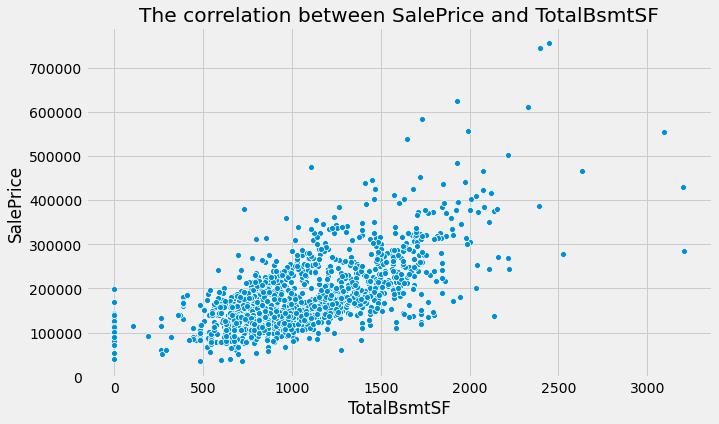

In [25]:
draw_scatterplot(train, 'TotalBsmtSF', 'SalePrice')

There are outliers in this case too.

Before we deal with these outliers, let use normalize the SalePrice values.

In [26]:
import numpy as np

train.SalePrice = np.log1p(train.SalePrice)

How are the sale prices distributed now?

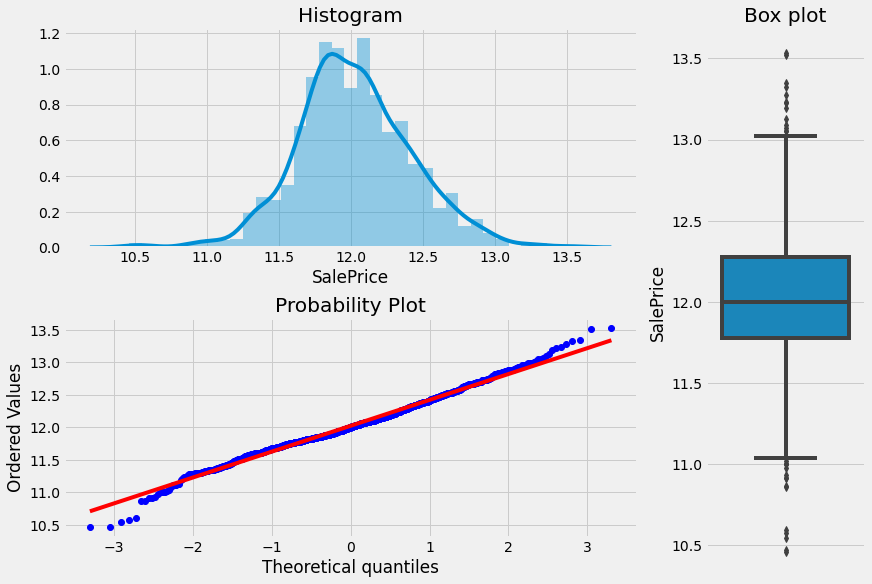

In [27]:
draw_three_combos(train.loc[:, 'SalePrice'], fig_size2)

The sale prices have been normalized.

Let us compare the residual plots of SalePrice and GrLivArea before and after we normalized the sale prices. A residual plot depicts the distances between data points and the regression line. A regression line represents the best fit of data. It specifies the ideal variations in a dependent variable based on changes in an independent variable.

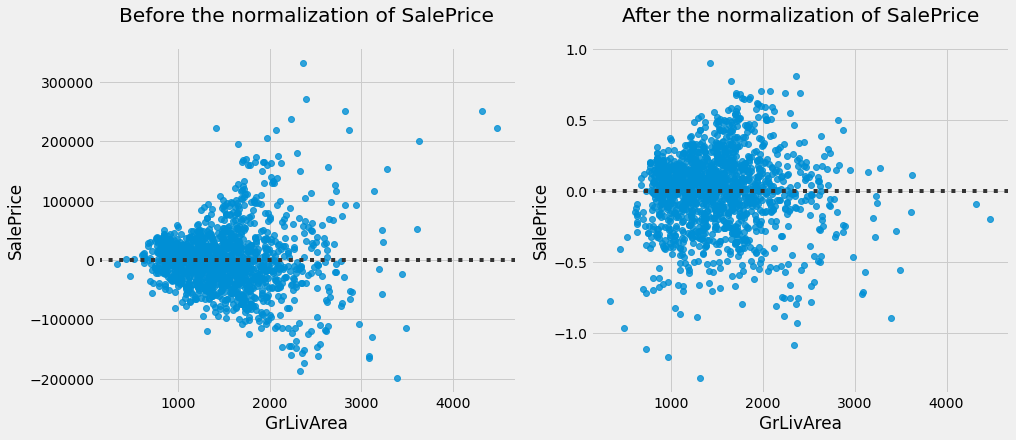

In [28]:
fig_size3 = (14, 6)

fig = plt.figure(constrained_layout=True, figsize=fig_size3)
grid = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Before the normalization of SalePrice', pad=25)
sns.residplot(x=train_v1.GrLivArea, y=train_v1.SalePrice, ax=ax1)

ax2 = fig.add_subplot(grid[0, 1:])
ax2.set_title('After the normalization of SalePrice', pad=25)
sns.residplot(x=train.GrLivArea, y=train.SalePrice, ax=ax2);

The second plot, which is based on post-normalization data, illustrates uniformity. The variances across either side of the zero line are almost&nbsp;equal.

Now that we have normalized sale prices, let us move on to the next step of the project.

## Feature engineering

In [29]:
# Removing the Id columns from the datasets because these columns won't help with calculations
# Saving the Id columns in case they are required later

train_id = train.Id
test_id = test.Id

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [30]:
train.shape, test.shape

((1458, 80), (1459, 79))

In [31]:
# Combining the training and testing datasets

combined = pd.concat((train, test)).reset_index(drop=True)

# Removing the SalePrice column from the combined dataset

y = combined.SalePrice.copy()

combined.drop('SalePrice', axis=1, inplace=True)

Some of the missing values in the dataset are relevant and add additional meaning. For example, any NA values in the BsmtQual column indicate that the corresponding houses don't have basements. Let us fill these missing values with the string 'None'.

In [32]:
cols_relevant_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',\
                    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',\
                    'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']

for col in cols_relevant_na:
    combined[col] = combined[col].fillna('None')

The NaN values in some of the numerical columns are also relevant. For example, a NaN BsmtFinSF1 most probably means that the corresponding house doesn't have a basement. Let us fill out these NaN values as well.

In [33]:
cols_relevant_nan = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',\
                    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

In [34]:
for col in cols_relevant_nan:
    combined[col] = combined[col].fillna(0)

The LotFrontage column probably has missing values because the corresponding houses aren't connected to streets. Let us fill out each of these values with the mean lot frontage of the corresponding neighborhood.

In [35]:
combined.LotFrontage = combined.groupby('Neighborhood').LotFrontage.transform(lambda x: x.fillna(x.mean()))

The MSZoning column has four missing values. We can fill each of these values with the mode of all MSZoning values within the corresponding MSSubClass. Before we do so, we will also convert the MSSubClass values into categorical variables. At present, they are of the int64&nbsp;type.

In [36]:
combined.MSSubClass = combined.MSSubClass.astype('str')

combined.MSZoning = combined.groupby('MSSubClass').MSZoning.transform(lambda x: x.fillna(x.mode()[0]))

Next, we will fill out all the remaining missing values with their typical categories or their corresponding modes.

In [37]:
combined.Utilities = combined.Utilities.fillna('AllPub')
combined.Functional = combined.Functional.fillna('Typ')
combined.KitchenQual = combined.KitchenQual.fillna('TA')
combined.Electrical = combined.Electrical.fillna('SBrkr')

combined.Exterior1st = combined.Exterior1st.fillna(combined.Exterior1st.mode()[0])
combined.Exterior2nd = combined.Exterior2nd.fillna(combined.Exterior2nd.mode()[0])
combined.SaleType = combined.SaleType.fillna(combined.SaleType.mode()[0])

There are no missing values in the dataset now.

In [38]:
combined.isnull().sum().sum()

0

Our next tasks is to fix any skewness in the numerical variables. What is their present state of skewness?

In [39]:
numerical_cols = combined.dtypes[combined.dtypes != 'object'].index

from scipy.stats import skew

col_skewness = combined[numerical_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

col_skewness

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.058803
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
MoSold            0.197345
OverallQual       0.189591
FullBath          0.165514
YrSold            0.131996
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

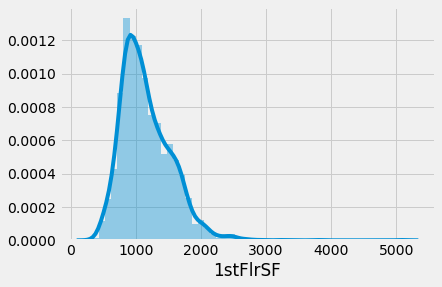

In [40]:
sns.distplot(combined['1stFlrSF']);

We will fix the skewness in these columns by using box-cox transformations.

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = col_skewness[abs(col_skewness) > 0.5]
skewed_features = high_skew.index

for feature in skewed_features:
    combined[feature] = boxcox1p(combined[feature], boxcox_normmax(combined[feature] + 1))

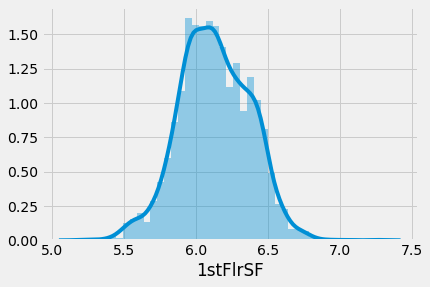

In [43]:
sns.distplot(combined['1stFlrSF']);

Next, let us add new features to the dataset.

In [44]:
combined['YearsSinceRemod'] = combined.YrSold - combined.YearRemodAdd

combined['TotalSF'] = (combined.TotalBsmtSF + combined['1stFlrSF'] + combined['2ndFlrSF'])

combined['TotalSqrFootage'] = (combined['BsmtFinSF1'] + combined['BsmtFinSF2'] +\
                               combined['1stFlrSF'] + combined['2ndFlrSF'])
                                 

combined['TotalBathrooms'] = (combined['FullBath'] + (0.5 * combined['HalfBath']) +\
                              combined['BsmtFullBath'] + (0.5 * combined['BsmtHalfBath']))
                               
combined['TotalPorchSF'] = (combined['OpenPorchSF'] + combined['3SsnPorch'] +\
                            combined['EnclosedPorch'] + combined['ScreenPorch'] +\
                            combined['WoodDeckSF'])

In [45]:
combined['YearsSinceRemod'] = combined['YearsSinceRemod'].apply(lambda x: 0 if x < 0 else x)

In [46]:
combined['HasPool'] = combined['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combined.HasPool = combined.HasPool.astype('str')

combined['Has2ndFloor'] = combined['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
combined.Has2ndFloor = combined.Has2ndFloor.astype('str')

combined['HasGarage'] = combined['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combined.HasGarage = combined.HasGarage.astype('str')

combined['HasBsmt'] = combined['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combined.HasBsmt = combined.HasBsmt.astype('str')

combined['HasFireplace'] = combined['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
combined.HasFireplace = combined.HasFireplace.astype('str')

Next, we will change the data types of the YrSold and MoSold columns. They are numerical at present.

In [47]:
combined.YrSold = combined.YrSold.astype('str')
combined.MoSold = combined.MoSold.astype('str')

We will change the data types of some of the other columns as well. These columns contain categorical data.

In [48]:
cols_to_change = ['OverallQual', 'OverallCond', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',\
                  'Fireplaces', 'GarageCars','YearsSinceRemod', 'YearRemodAdd']

for col in cols_to_change:
    combined[col] = combined[col].astype('str')

We will also remove a few columns because there is not much variation in their values. Almost all their fields have the same&nbsp;value.

In [49]:
combined = combined.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

Now, we will scale the numerical variables and create dummies from the catgorical variables.

In [50]:
numerical_cols = combined.dtypes[combined.dtypes != 'object'].index
categorical_cols = combined.dtypes[combined.dtypes == 'object'].index

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])

In [52]:
def create_dummies(df, column_name):
    '''
    Converts a dataset column into dummy variables and appends the dummies to the dataset
    '''
    df = pd.get_dummies(df, columns = [column_name], prefix=column_name)
    return df

In [53]:
for col in categorical_cols:
    combined = create_dummies(combined, col)

In [54]:
# Splitting the datasets back into training and testing data

X = combined[:1458]
y = y[:1458]
X_test = combined[1458:]

In [55]:
X.shape, y.shape, X_test.shape

((1458, 507), (1458,), (1459, 507))

In [56]:
def overfit_reducer(df):
    """
    Returns a list of dataframe features that are overfitted
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit

In [57]:
overfitted_features = overfit_reducer(X)

In [58]:
X = X.drop(overfitted_features, axis=1)
X_test = X_test.drop(overfitted_features, axis=1)

In [59]:
X.shape, X_test.shape

((1458, 502), (1459, 502))

## Model training

In [60]:
from sklearn.model_selection import KFold, cross_val_score

kfolds = KFold(n_splits=10, shuffle=True, random_state=seed)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
# RMSLE

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Model scoring function

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

In [63]:
# Importing relevant modules

from datetime import datetime
import xgboost as xgb
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [64]:
# Setting up models 

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))
                                        
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)
                                   

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
                                       

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [65]:
# Preparing a stack

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [66]:
print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )


print('Start Fitting')

print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print(datetime.now(), 'elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print(datetime.now(), 'lasso')
lasso_model_full_data = lasso.fit(X, y)

print(datetime.now(), 'ridge')
ridge_model_full_data = ridge.fit(X, y)

print(datetime.now(), 'svr')
svr_model_full_data = svr.fit(X, y)

print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print(datetime.now(), 'xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print(datetime.now(), 'lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

TEST score on CV
Kernel Ridge score: 0.1139 (0.0107)
 2020-10-08 17:37:28.980957
Lasso score: 0.1128 (0.0106)
 2020-10-08 17:37:44.697058
ElasticNet score: 0.1128 (0.0106)
 2020-10-08 17:38:41.228141
SVR score: 0.1117 (0.0131)
 2020-10-08 17:38:59.537658
Lightgbm score: 0.1219 (0.0151)
 2020-10-08 17:39:13.628254
GradientBoosting score: 0.1187 (0.0138)
 2020-10-08 17:41:00.672212
[17:41:00] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:59] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:59] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:42:57] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:42:57] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:55] WARNING: ..

In [67]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))
            
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.06373647010270996


In [68]:
print('Predict submission', datetime.now(),)
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_test)))

print('Blend with Top Kernals submissions', datetime.now(),)
sub_1 = pd.read_csv('../input/top-scores/House_Prices_submit.csv')
sub_2 = pd.read_csv('../input/top-scores/hybrid_solution.csv')
sub_3 = pd.read_csv('../input/top-scores/lasso_sol.csv')

submission.iloc[:,1] = np.floor((0.25 * np.floor(np.expm1(blend_models_predict(X_test)))) + 
                                (0.25 * sub_1.iloc[:,1]) + 
                                (0.25 * sub_2.iloc[:,1]) + 
                                (0.25 * sub_3.iloc[:,1]))

Predict submission 2020-10-08 17:59:30.127032
Blend with Top Kernals submissions 2020-10-08 17:59:32.876655


In [69]:
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

submission.to_csv("new_submission.csv", index=False)
print('Save submission', datetime.now(),)

Save submission 2020-10-08 17:59:36.263186


In [70]:
submission.head()

,Id,SalePrice
0,1461,120509.0
1,1462,162914.0
2,1463,186770.0
3,1464,200757.0
4,1465,190885.0


## References

https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing